In [1]:
from nn.neural_network import NeuralNetwork

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, load_iris

from nn.dense import Dense

In [2]:
def show(df, title=None):
    # Visualización del mapa de predicción.
    plt.figure(figsize=(8, 4))
    plt.title(title)
    # Visualización de la nube de datos.
    plt.scatter(df[df._class == 0][1], df[df._class == 0][3], c='slateblue')
    plt.scatter(df[df._class == 1][1], df[df._class == 1][3], c='salmon')
    plt.scatter(df[df._class == 2][1], df[df._class == 2][3], c='greenyellow')

In [3]:
X, y = load_iris(return_X_y=True)
X = pd.DataFrame(X)
X['_class'] = y
X

,0,1,2,3,_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
np.random.seed(10)
trainset, testset = train_test_split(X, test_size=0.3)

X_train = trainset[[i for i in range(4)]]
y_train = trainset._class.to_numpy()

X_test = testset[[i for i in range(4)]]
y_test = testset._class.to_numpy()

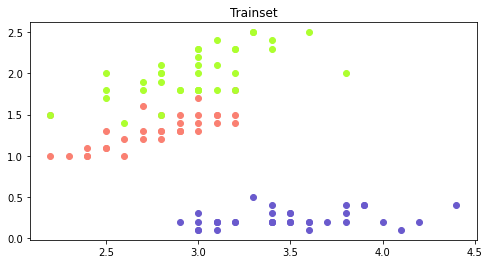

In [5]:
show(trainset, title='Trainset')

In [6]:
model = NeuralNetwork(loss_f='mse')

model.add_layer(Dense(n_neur=X_train.shape[1]))
model.add_layer(Dense(n_neur=4, act_f='sigmoid'))
model.add_layer(Dense(n_neur=8, act_f='sigmoid'))
model.add_layer(Dense(n_neur=3, act_f='sigmoid'))

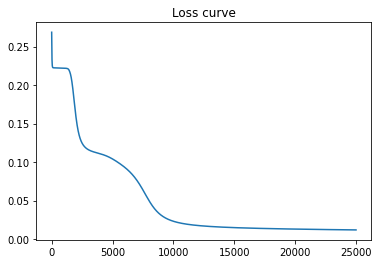

<Figure size 576x288 with 0 Axes>

In [7]:
_y_train = [[1 if i == x else 0 for i in range(3)] for x in y_train] 
loss = model.fit(X_train.to_numpy(), _y_train, epoch=25000, lr=0.002)
plt.plot(list(range(len(loss))), loss)
plt.title('Loss curve')
plt.figure(figsize=(8, 4))
plt.show()

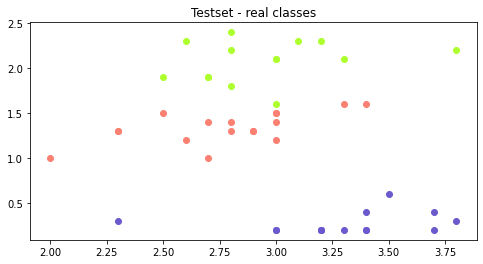

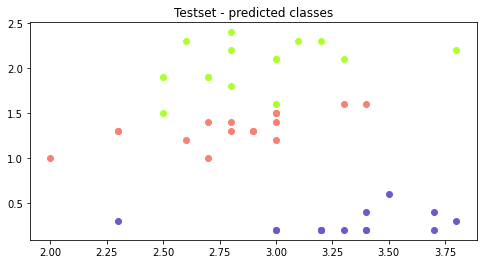

In [8]:
yp = model.predict(X_test.to_numpy())
predicted_clases = [np.argmax(x) for x in yp]
X_test['_class'] = predicted_clases
show(testset, title='Testset - real classes')
show(X_test, title='Testset - predicted classes')